# Building a Simple Chatbot from Scratch in Python (using NLTK)

![Alt text](https://cdn-images-1.medium.com/max/800/1*pPcVfZ7i-gLMabUol3zezA.gif)

History of chatbots dates back to 1966 when a computer program called ELIZA was invented by Weizenbaum. It imitated the language of a psychotherapist from only 200 lines of code. You can still converse with it here: [Eliza](http://psych.fullerton.edu/mbirnbaum/psych101/Eliza.htm?utm_source=ubisend.com&utm_medium=blog-link&utm_campaign=ubisend). 

On similar lines let's create a very basic chatbot utlising the Python's NLTK library.It's a very simple bot with hardly any cognitive skills,but still a good way to get into NLP and get to know about chatbots.

For detailed analysis, please see the accompanying blog titled:**[Building a Simple Chatbot in Python (using NLTK](https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e)


## NLP
NLP is a way for computers to analyze, understand, and derive meaning from human language in a smart and useful way. By utilizing NLP, developers can organize and structure knowledge to perform tasks such as automatic summarization, translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation.

## Import necessary libraries

In [10]:
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

## Downloading and installing NLTK
NLTK(Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

[Natural Language Processing with Python](http://www.nltk.org/book/) provides a practical introduction to programming for language processing.

For platform-specific instructions, read [here](https://www.nltk.org/install.html)



In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### Installing NLTK Packages




In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
# nltk.download('punkt') # first-time use only
# nltk.download('wordnet') # first-time use only

True

## Reading in the corpus

For our example,we will be using the Wikipedia page for chatbots as our corpus. Copy the contents from the page and place it in a text file named ‘chatbot.txt’. However, you can use any corpus of your choice.

In [13]:
f=open('chatbot.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase


The main issue with text data is that it is all in text format (strings). However, the Machine learning algorithms need some sort of numerical feature vector in order to perform the task. So before we start with any NLP project we need to pre-process it to make it ideal for working. Basic text pre-processing includes:

* Converting the entire text into **uppercase** or **lowercase**, so that the algorithm does not treat the same words in different cases as different

* **Tokenization**: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

_The NLTK data package includes a pre-trained Punkt tokenizer for English._

* Removing **Noise** i.e everything that isn’t in a standard number or letter.
* Removing the **Stop words**. Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words
* **Stemming**: Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.
* **Lemmatization**: A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.



## Tokenisation

In [14]:
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

## Preprocessing

We shall now define a function called LemTokens which will take as input the tokens and return normalized tokens.

In [15]:
lemmer = nltk.stem.WordNetLemmatizer()
print(lemmer)
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
print(string.punctuation)
# ord() - return unicode values of the character,  simply means it returns ascii code of the character
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
print(remove_punct_dict)

# The translate() method returns a string where some specified characters are replaced with the character described in a dictionary, or in a mapping table.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

<WordNetLemmatizer>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


## Keyword matching

Next, we shall define a function for a greeting by the bot i.e if a user’s input is a greeting, the bot shall return a greeting response.ELIZA uses a simple keyword matching for greetings. We will utilize the same concept here.

In [16]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

## Generating Response

### Bag of Words
After the initial preprocessing phase, we need to transform text into a meaningful vector (or array) of numbers. The bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

* A vocabulary of known words.

* A measure of the presence of known words.

Why is it is called a “bag” of words? That is because any information about the order or structure of words in the document is discarded and the model is only **concerned with whether the known words occur in the document, not where they occur in the document.**

The intuition behind the Bag of Words is that documents are similar if they have similar content. Also, we can learn something about the meaning of the document from its content alone.

For example, if our dictionary contains the words {Learning, is, the, not, great}, and we want to vectorize the text “Learning is great”, we would have the following vector: (1, 1, 0, 0, 1).


### TF-IDF Approach
A problem with the Bag of Words approach is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content”. Also, it will give more weight to longer documents than shorter documents.

One approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called Term Frequency-Inverse Document Frequency, or TF-IDF for short, where:

**Term Frequency: is a scoring of the frequency of the word in the current document.**

```
TF = (Number of times term t appears in a document)/(Number of terms in the document)
```

**Inverse Document Frequency: is a scoring of how rare the word is across documents.**

```
IDF = 1+log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
```
### Cosine Similarity

Tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus

```
Cosine Similarity (d1, d2) =  Dot product(d1, d2) / ||d1|| * ||d2||
```
where d1,d2 are two non zero vectors.

<!-- ![image.png](attachment:image.png) -->

To generate a response from our bot for input questions, the concept of document similarity will be used. We define a function response which searches the user’s utterance for one or more known keywords and returns one of several possible responses. If it doesn’t find the input matching any of the keywords, it returns a response:” I am sorry! I don’t understand you”

cosine similarity maths

<!-- 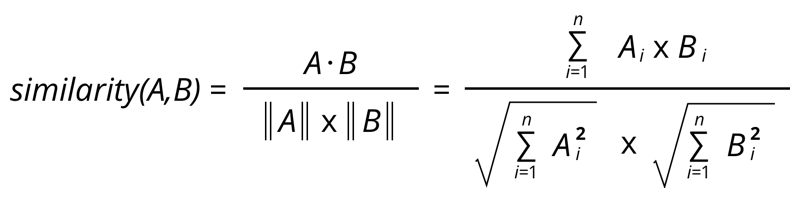 -->


In [17]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
#     documentation for cosine_similarity
#     https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

#     explanation https://www.geeksforgeeks.org/numpy-argsort-in-python/
#     here argsort() sort the cosine_similarity score array and returns the sorted array index
#     shape is some what (1,73) 
#     after the sorting
#     last value is the user response and second last value has the most similar value that's why we called it here [0][-2]
    idx=vals.argsort()[0][-2]

#     this is to flatten the matrices of (x,x) => (1,x)
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

Finally, we will feed the lines that we want our bot to say while starting and ending a conversation depending upon user’s input.

In [18]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
